# K Means Clustering

# Resources Used 
For this project I will be using a Jake VanderPlas's k-Nearest Clustering Jupyter notebook. 
- Link to the notebook: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

- ChatGPT

# Business Understanding 

**Objective:** To understand supervised K means clustering  model and how its clustering algorithm works.  

**Success Criteria:** To gain an undestanding of K Means Clustering and to see the effectiveness of K-means clustering in changing cluster size and sample size to see its outcome on predicting cluster labels. reducing the color space of images, reviewing the quality of the resulting images. 

# Data Understanding

**Data Collection:** The digit dataset was imported from sklearn.datasets. The flower image used was provided by scikit-learn.

**Data Description:** The flower image has a resolution of 427 pixels in height and 640 pixels in width.
The color channels are represented in RGB (Red, Green, Blue) format, with each channel having values ranging from 0 to 255.

**Data Exploration:** Visualise the clusters using make_blobs. 

Display the flower image to visually inspect its height, width and RGB. 




# Data Preperation 

**Data Cleaning:** No cleaning was required for any datasets for this notebook.




# Modelling 

**Digit Dataset:**
Implemented the KNN classification algorithm using scikit-learn's KNeighborsClassifier.
Tuned hyperparameters such as the number of neighbors (n_neighbors) to see how the model performs.

**Flower Image:**
Applied supervised K-means clustering using scikit-learn's MiniBatchKMeans algorithm.
Experimented with different numbers of clusters 

# Evaluation 

Assessed the performance of the supervised K-means clustering model by changing cluster size to see how well the kmeans algorithm performs and testing the Spectral Clustering algorithm.

Examining the image quality of the flower image when we change the number of pixels to be plotted in the scatter plot e.g changing it from 10,000 to 20,000 pixels. 


## Changes Made to Notebook 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')

For the changes I decided to increase the centers and sample size to see if k-means algorithm can automatically assign points to the clusters when they're are multiple clusters in the feature space. 
I have changed the centers to 20 and the sample size to 800. 

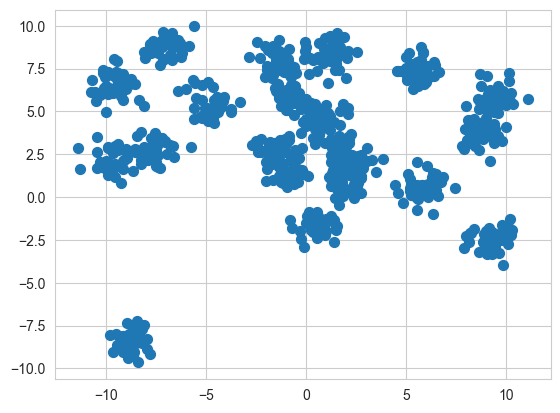

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=800, centers=20,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

I imported the Kmeans clustering algorithm that partitions data points into K clusters based on their features. I also changed the cluster number to match the cluster change from above. 

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Despite changing the cluster size, the Kmeans algorithm is still able to predict the cluster labels for each data point in X. 

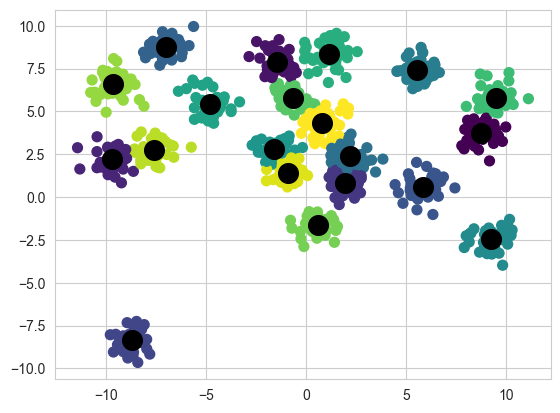

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(500, noise=.10, random_state=0)

Given that K-means assumes data points are closer to their cluster centers than to others, the algorithm's effectiveness diminishes when clusters are spread widely across the feature space. I increased the sample size to 700 and change the noise variable to 0.10 to see the changes. The noise parameter controls the standard deviation of the Gaussian noise added to the data, which influences the degree of randomness in the points. 

The changes are slightly significant as now the data points are more spread out.

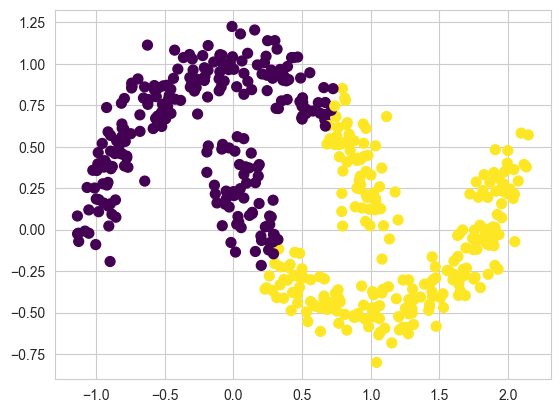

In [8]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Using The Spectral Clustering on the same data as previous does not change anything 



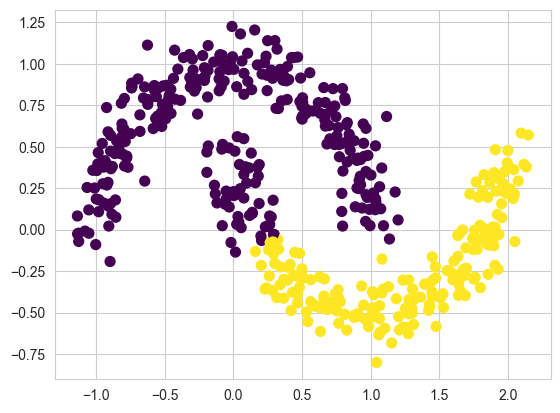

In [9]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

I increased n_clusters to 10, and now the Spectral Clustering algorithm will attempt to partition the data into 10 clusters instead of 2, it's using the nearest neighbors affinity and employing the K-means algorithm for label assignment.

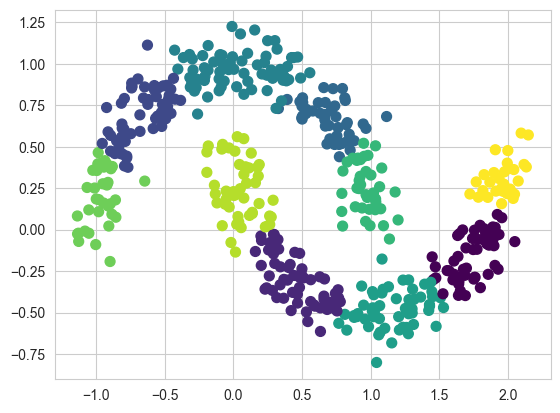

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# K-Means On Digits 

I loaded in the digit dataset used in Jake VanderPlas's notebook and other necessary imports. 

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

I changed the `n_clusters` to 20 

In [12]:
kmeans = KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(20, 64)

Increasing the cluster size to 20 could lead to clusters capturing more specific characteristics of the digits but it could also lead to overfitting since the model could capture more noise or irrelevant data.

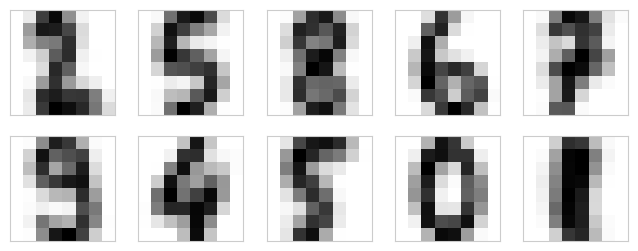

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(20, -1)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(8, 8), interpolation='nearest', cmap=plt.cm.binary)


In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Changing the cluster size from 10 to 20 has significantly impacted the accuracy score. The original accruacy score for this was 0.7935447968836951 and it has decreased to 0.5692821368948247.

Possible reasons for this:

1. Overfitting: with 20 clusters, the model is possibly learning the training data too well or capturing noise.

2. Increased Complexity: Having more clusters increases the complexity of the model. With 20 clusters, the model might become overly complex, which makes it harder to process new data. 

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.5692821368948247

With Jake Vanderplas's notebook, the main point of confusion was between the eights and ones but since increasing the cluster size, it seems the main point of confusion has spread out amongst other digits. 

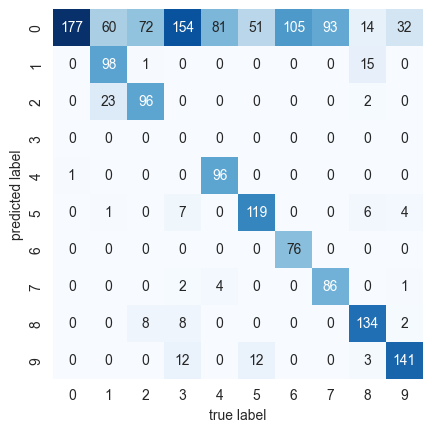

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# K-Means For Colour Compression

For this I have changed the original image from China to an image of a flower. 

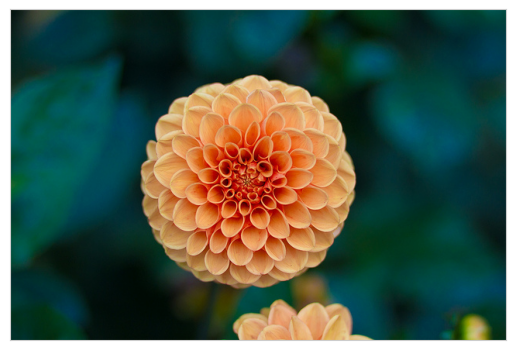

In [29]:
# Note: this requires the PIL package to be installed
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

The image has a height of 427 pixels.
The image has a width of 640 pixels.
The image has 3 integers, which typically represent the Red, Green, and Blue (RGB) color channels

In [30]:
flower.shape

(427, 640, 3)

The below code displays the flowers set of pixels in a three dimensional colour space and rescales it so that the colours lie between 0 and 1. 

The original code visualises the pixels in this colour space using a subset of 10,000 pixels, Ive decided to change it to 20,000 pixels to note the change. 

By changing the value, the scatter plot has become denser and the data points are more spread out. Having a denser scatter plot means that there are more individual points close together. 

This can offer more insights into the data but it can also lead to overplotting and visual clutter. 

In [31]:
data = flower / 255.0  # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

In [33]:
def plot_pixels(data, title, colors=None, N=20000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

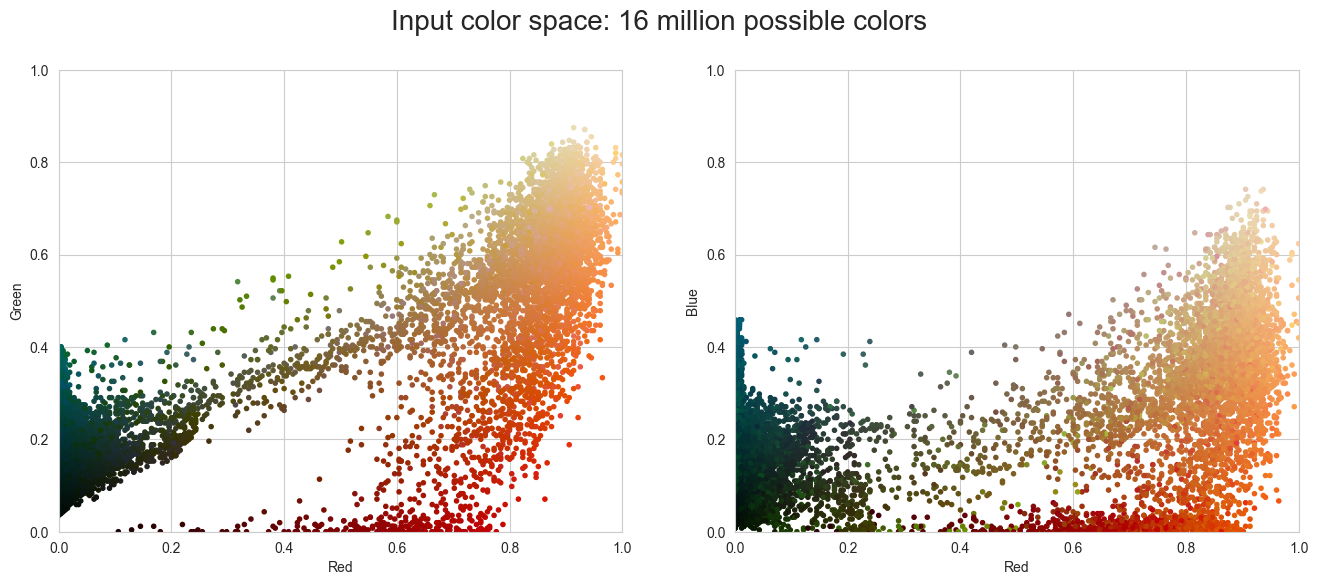

In [34]:
plot_pixels(data, title='Input color space: 16 million possible colors')

I reduced the 16 million colours down to 8 colours to see the difference.

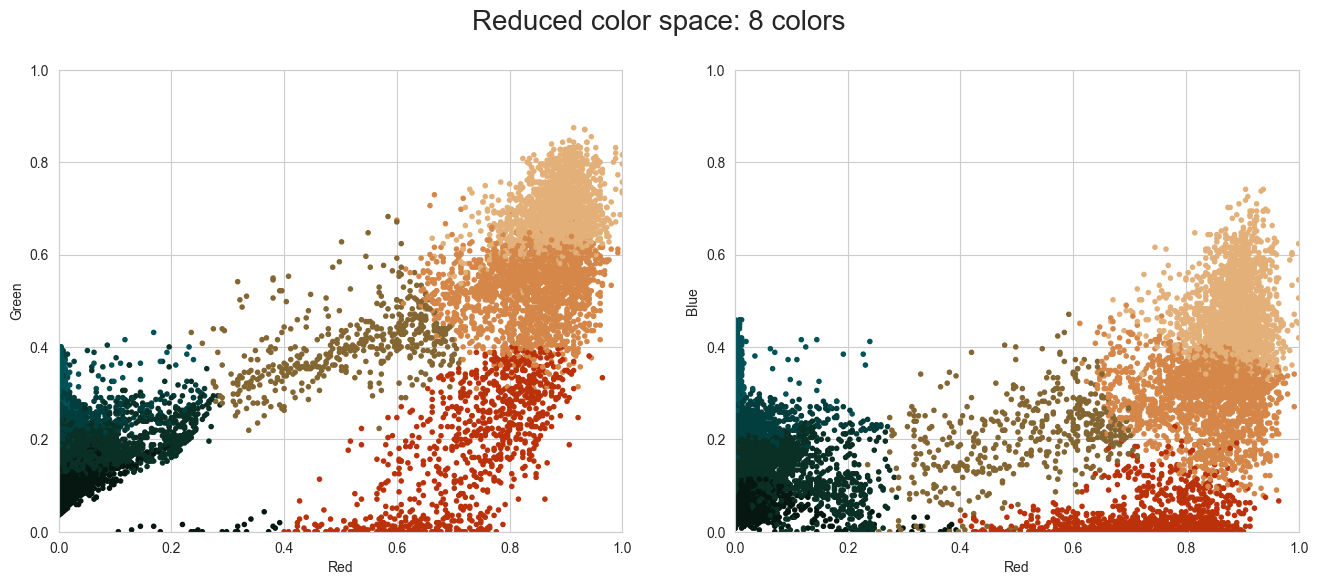

In [37]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(8)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 8 colors")

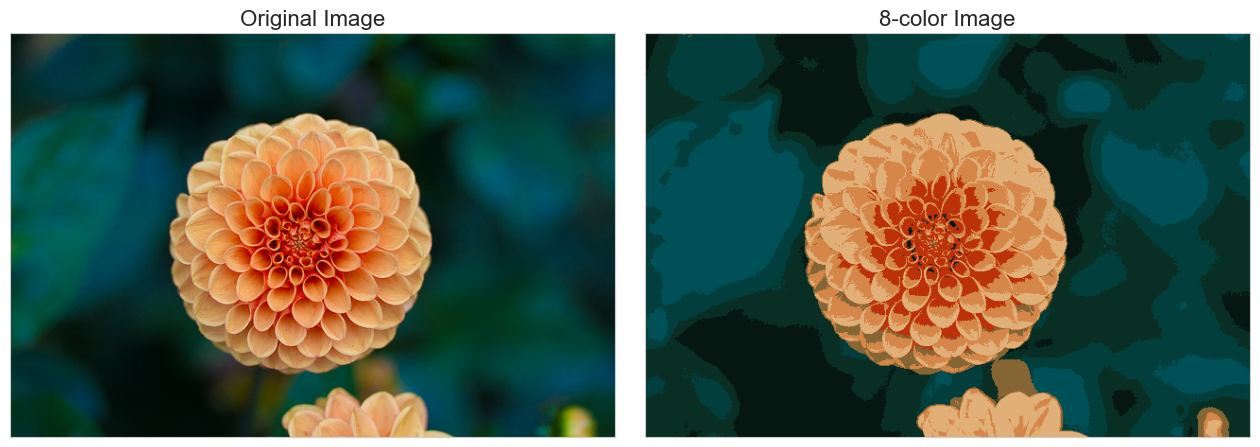

In [38]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('8-color Image', size=16);

Some detail is lost but we can still recognise that image of the right is a flower. I decided to reduce it down further. 

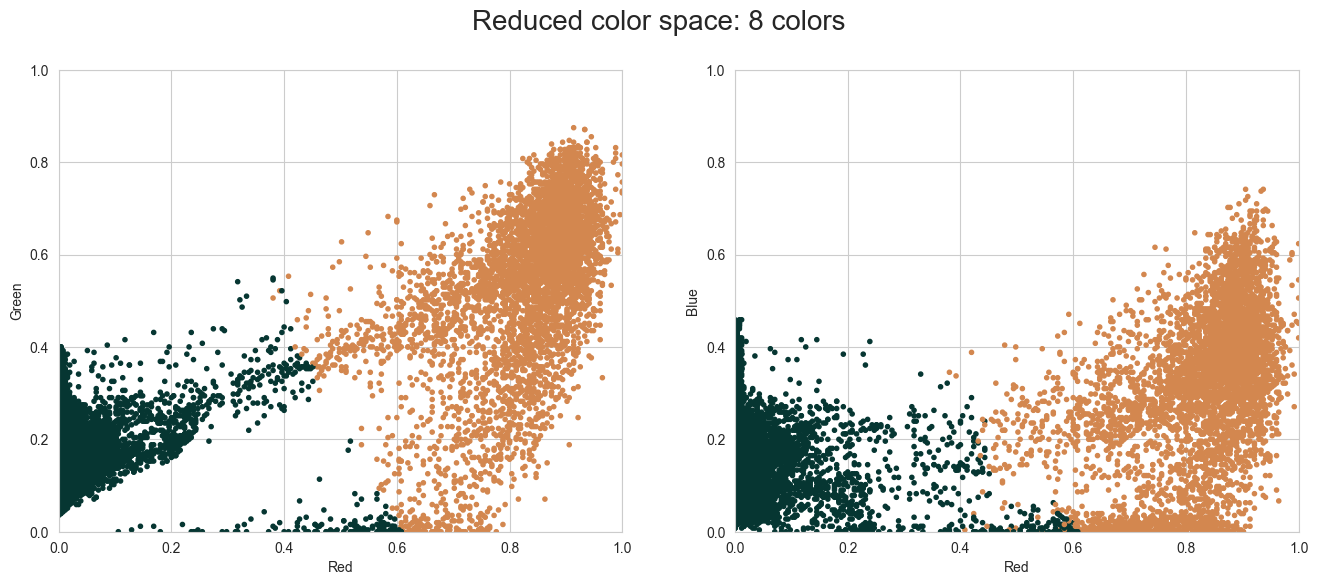

In [39]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 8 colors")

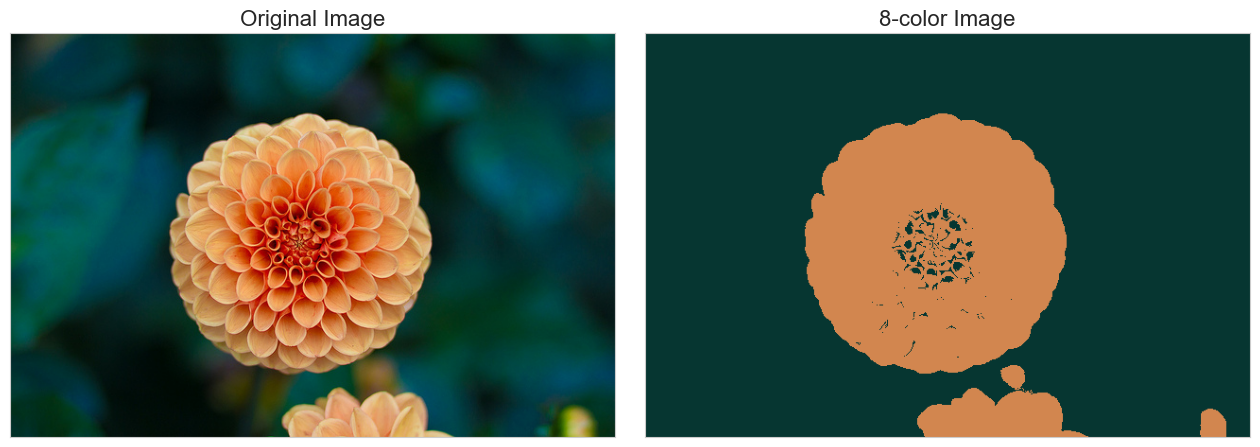

In [40]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('2-color Image', size=16);

A couple of things to note that happens. 
 - As you reduce the number of colors, the image loses color detail. 
 - Image compression occurs. It reduces the amount of information needed to display the image which makes it more compact but as you can see above it becomes harder to realise the image we're looking at is meant to be a flower. 
